#Name: Ameer Hamza

#Email: ameer4955@gmail.com

###Importing related libraries to read and analyze dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

In [ ]:
df = pd.read_csv("housing.csv")
print(df.shape)
df.head(5)
df.info()

#1. Perform EDA on the Dataset Which should include

##1.a. Visualization and explore the data using seaborn

In [ ]:
fig = plt.figure(figsize=(12, 14))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    sns.histplot(df[df.columns[i]], kde= True)
    plt.ylabel("")
plt.show()
print("\n'ocean_proximity' column is not shown in these graphs as it only had nominal values.")

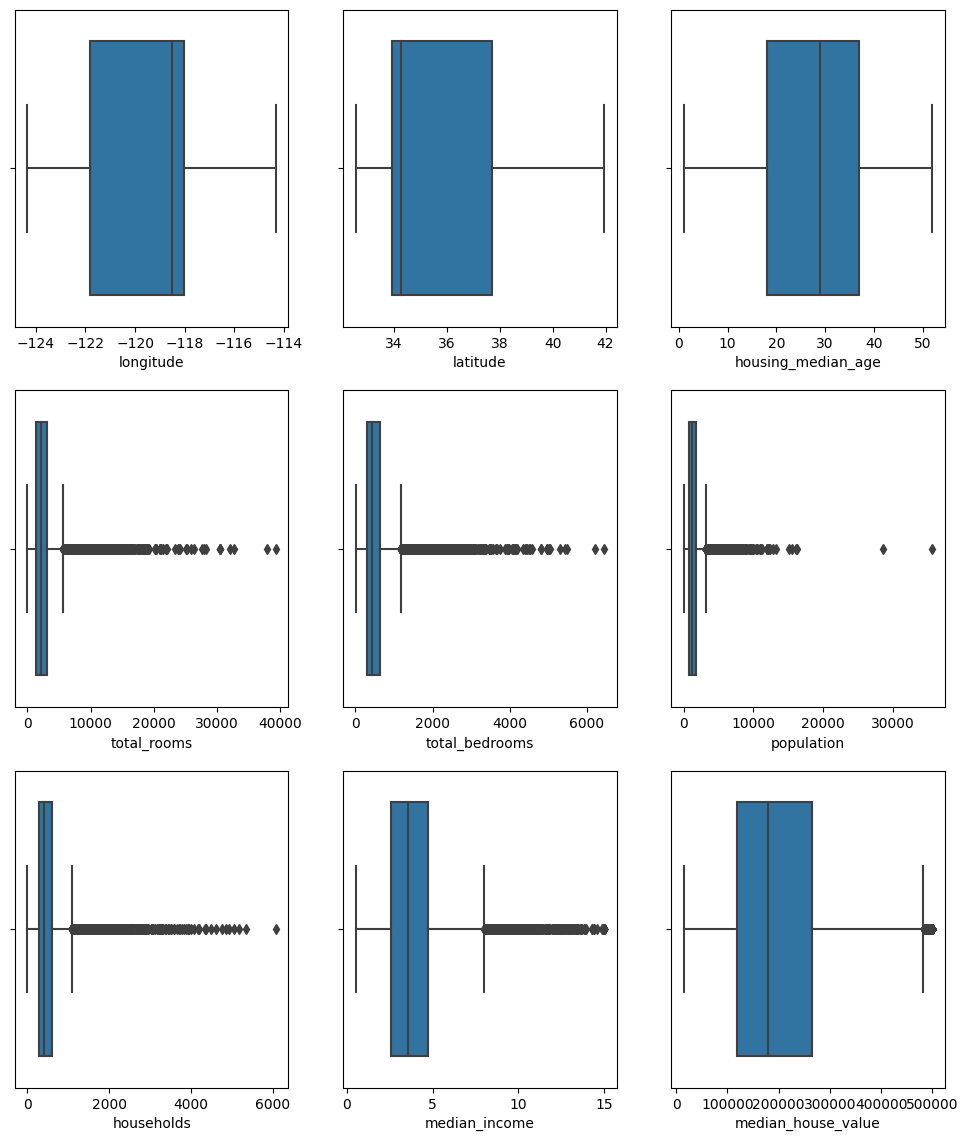


'ocean_proximity' column is not shown in these graphs as it only had nominal values.


In [9]:
fig = plt.figure(figsize=(12, 14))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(x = df[df.columns[i]])
    plt.ylabel("")
plt.show()
print("\n'ocean_proximity' column is not shown in these graphs as it only had nominal values.")

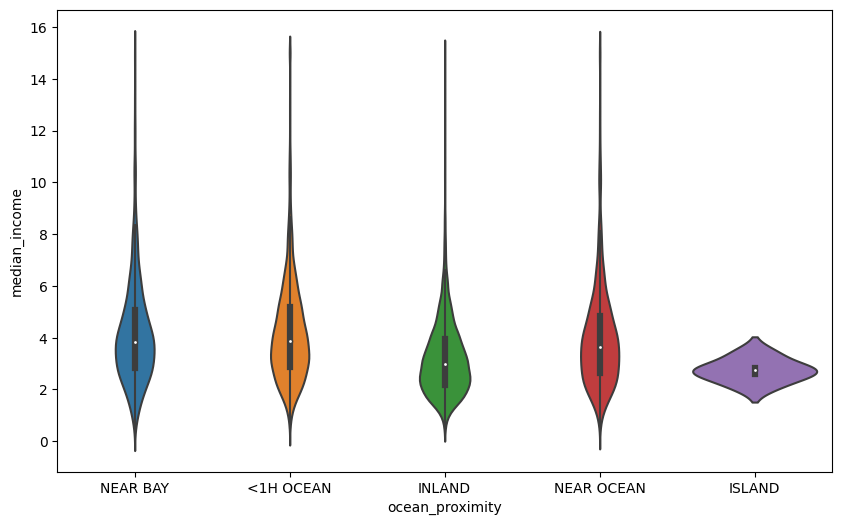

In [26]:
fig = plt.figure(figsize=(10, 6))
sns.violinplot(data = df, x = "ocean_proximity", y = "median_income")
plt.show()


##1.a.i. Add your findings about the data under each graph in the code notebook
longitude: This graph is negative skewed. It shows that most of the houses are in close proximity.

latitude: This graph is positive skewed. It shows that most of the houses are in close proximity.

housing_median_age: This graph shows that median housing age is between 15 to 50.

total_rooms: This graph indicates that most of the housings has less than 1000 rooms. We can also see outleirs in boxplot.

total_bedrooms: This graph indicates that most of the housings has less than 1000 bedrooms. We can also see outleirs in boxplot.

population: This positively skewed graph indicates that most of the hosuings are very less populated.

households: This graph shows very less numbers of households in the housings.

median_income: Median income is around three while some outliers can be seen upto 15.

median_house_value: This diverse valued graph shows that hosuing values vary very much, we can also see some outleirs after the maximum value.

ocean_proximity: This is plotted by using violen plot as it has catogorical values. This info can be use to remove outlier or impute missing values.

## 1.b. Identify the data patterns if exist for single/multiple variables



In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, fmt=".2f")
plt.show()

## 1.b.i. Write your findings under the plots or code that identify the pattern
From heatmap, we can conclude that only five items have a strong relation.
1.   Longitude
2.   Latitude
3.   Total_rooms
4.   Total_bedrooms
5.   Population


## 1.c. Clean the dataset, remove the missing values as mentioned in the Lectures 15


In [ ]:
#showing data with info function to check total number of entries, missing entries and Dtypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


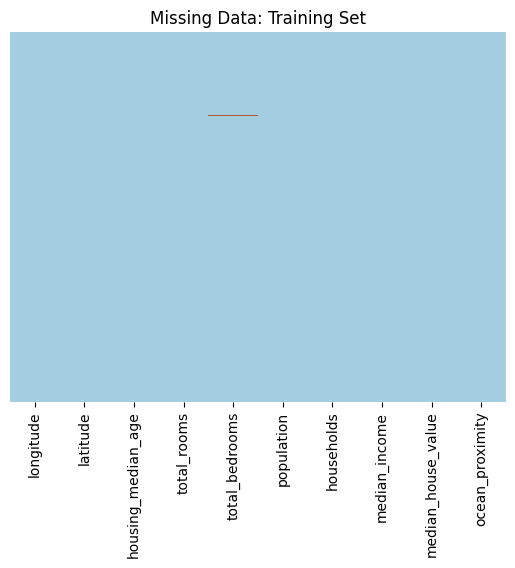

In [ ]:
#showing data with headmap to check total number of missing entries visually
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Paired')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
df = pd.read_csv("housing.csv")


#dropping bedrooms as we have another same column named rooms
df = df.drop(["total_bedrooms"], axis=1)

# Remove rows which have missing entries
df.dropna(inplace = True)

# Remove duplicate rows
df = df.drop_duplicates()

# Renaming column heads
df = df.rename(columns={"longitude": "long",   "latitude": "lat",
                        "housing_median_age": "age", "median_income": "income",
                        "median_house_value": "value", "total_rooms":"rooms"})


df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   long             20640 non-null  float64
 1   lat              20640 non-null  float64
 2   age              20640 non-null  int64  
 3   rooms            20640 non-null  int64  
 4   population       20640 non-null  int64  
 5   households       20640 non-null  int64  
 6   income           20640 non-null  float64
 7   value            20640 non-null  int64  
 8   ocean_proximity  20640 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 1.6+ MB


,long,lat,age,rooms,population,households,income,value,ocean_proximity
0,-122.23,37.88,41,880,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,565,259,3.8462,342200,NEAR BAY


## 1.c.i. Explain your approach in the Collab notebook text cell

I have removed 207 rows with missing entries in column **total_bedrooms**, which is only 1% of full data and it will not have any seious impact.

I have also dropped the **ocean_proximity** column(datatype object) and added 4 new column according to its indicator variable.

## 1.d. Select the target variable and clearly mention the reason for selecting it.
I have selected **ocean_proximity** as target variable as it is most desired value in many cases. For example, if a person want to invest in housing. There are many other values like total_rooms or household but we will test our targeted variable only.



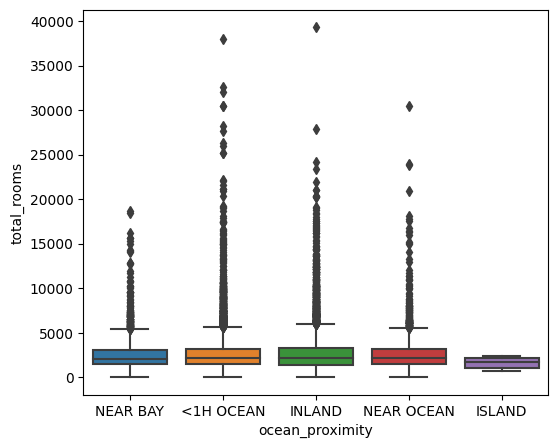

In [ ]:
df = pd.read_csv("housing.csv")
fig = plt.figure(figsize=(6, 5))
sns.boxplot(data= df, x= "ocean_proximity", y= "total_rooms")
plt.show()

## 1.e. Separate the target variable from the data set.

In [ ]:
#selecting target variable
x = df.drop("ocean_proximity", axis=1)
y = df["ocean_proximity"]

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   long        20640 non-null  float64
 1   lat         20640 non-null  float64
 2   age         20640 non-null  int64  
 3   rooms       20640 non-null  int64  
 4   population  20640 non-null  int64  
 5   households  20640 non-null  int64  
 6   income      20640 non-null  float64
 7   value       20640 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.4 MB


#2. Use the Scikit Learn Library to fit the Classification model
## 2.a. Split the data into train test sets

In [ ]:
#spliting training and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .20, random_state= 90)

## 2.b. Use logistic regression to train the model

In [ ]:
from sklearn.linear_model import LogisticRegression

#training model
lin_reg = LogisticRegression(max_iter=1000)
lin_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1500)

## 2.c.

In [ ]:
from sklearn.metrics import accuracy_score

#prediction by model
y_predict = lin_reg.predict(x_test)

#checking accuracy of model
model_accuracy = accuracy_score(y_test, y_predict)*100
print(f"Accuracy of this regression model is: {model_accuracy:.2f}%")

Accuracy of this regression model is: 65.29%


## Conclusion
The model successfully predicted the target variable for 65.29% of the test data. The model's accuracy is not particularly great, but it is still more accurate than a random guess.